In [1]:
import pandas as pd

import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

logging.root.manager.loggerDict

In [4]:
pylab.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams.update({'font.size': 14})

In [3]:
from eval_tensor import consistent_name_d

In [5]:
df = pd.read_pickle('/mnt/permanent/home/makrai/project/verb-tensor/verb/dataframe/assoc0to4.pkl')

In [6]:
df = df.sample(frac=.01)

In [7]:
df.rename(columns=consistent_name_d, inplace=True)

In [8]:
df.columns

Index(['freq', 'freq_nsubj', 'freq_ROOT', 'freq_dobj',
       'freq_('nsubj', 'ROOT')', 'freq_('nsubj', 'dobj')',
       'freq_('ROOT', 'dobj')', 'log_prob_freq_nsubj', 'log_prob_freq_ROOT',
       'log_prob_freq_dobj', 'log_prob_freq_('nsubj', 'ROOT')',
       'log_prob_freq_('nsubj', 'dobj')', 'log_prob_freq_('ROOT', 'dobj')',
       'log_freq', 'log_prob', 'pmi_vanl', 'iact_vanl', 'pmi_norm',
       'iact_norm', 'pmi_sali', 'iact_sali', 'dice_vanl', 'dice_sali'],
      dtype='object')

# Histograms of $log(p)$ and the two PMIs values

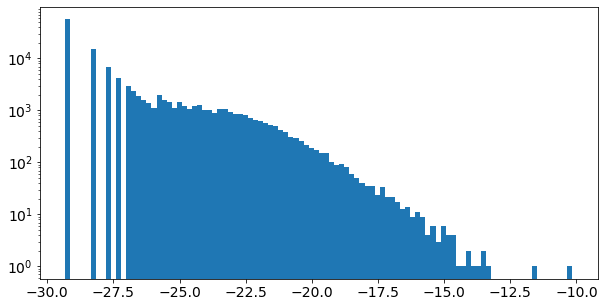

In [9]:
_ = plt.hist(df.log_prob, bins=100, log=True)

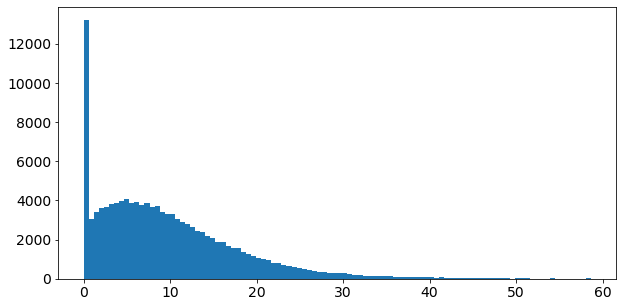

In [10]:
_ = plt.hist(df.pmi_vanl, bins=100)

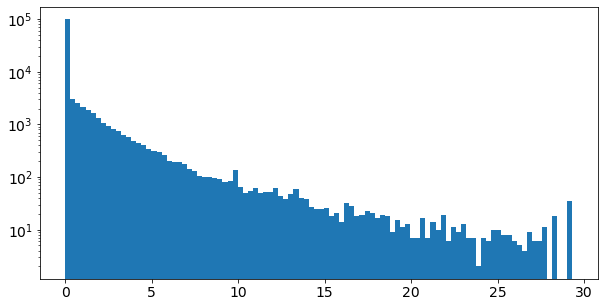

In [11]:
_ = plt.hist(df.iact_vanl, bins=100, log=True)

# PMI is is biased towards rare events

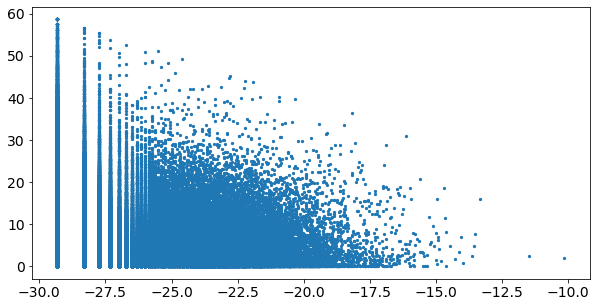

In [12]:
_ = plt.scatter(df.log_prob, df.pmi_vanl, s=5)

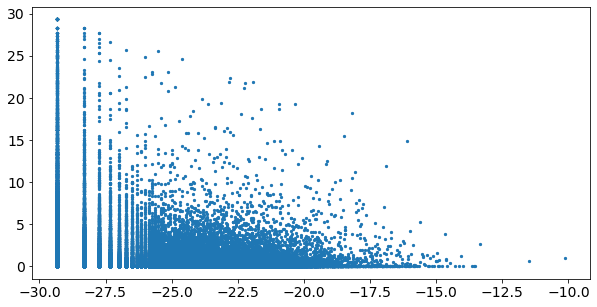

In [13]:
_ = plt.scatter(df.log_prob, df.iact_vanl, s=5)

# Salience: `*=` $\log(p)$

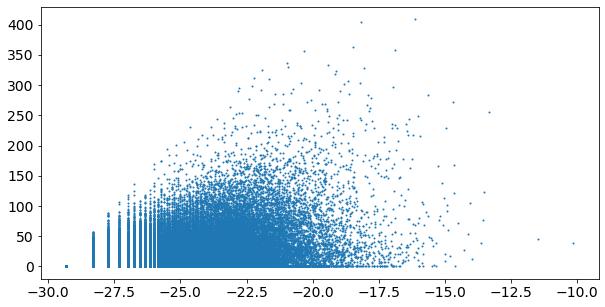

In [25]:
_ = plt.scatter(df.log_prob, df.pmi_sali, s=1)

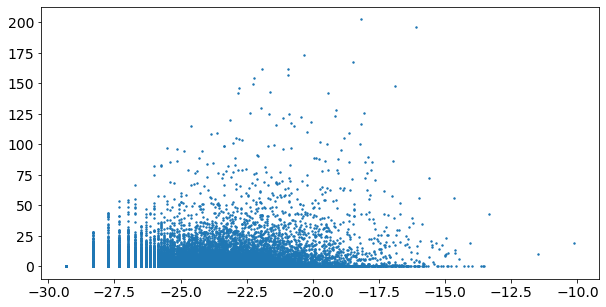

In [26]:
_ = plt.scatter(df.log_prob, df.iact_sali, s=2)

# Normalized PMI

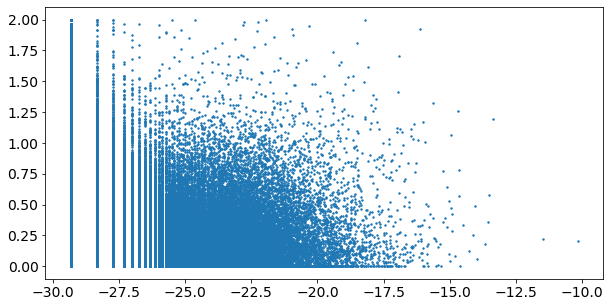

In [27]:
_ = plt.scatter(df.log_prob, df.pmi_norm, s=2)

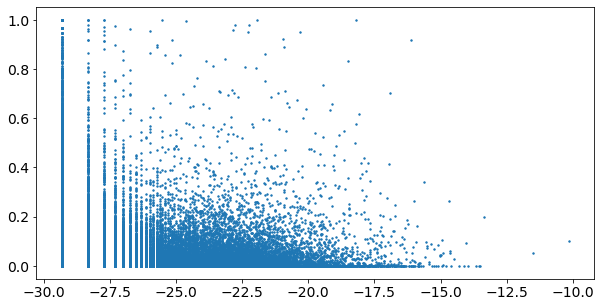

In [28]:
_ = plt.scatter(df.log_prob, df.iact_norm, s=2)

# Normalized vs salience

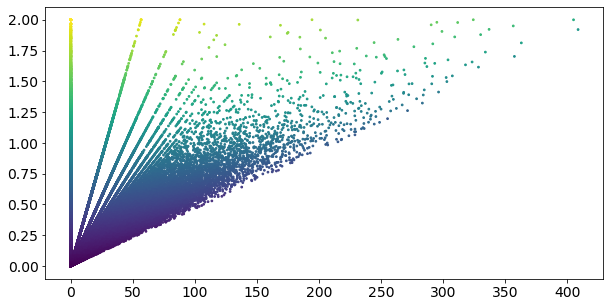

In [30]:
plt.scatter(df.pmi_sali, df.pmi_norm, s=3, c=df.pmi_vanl)

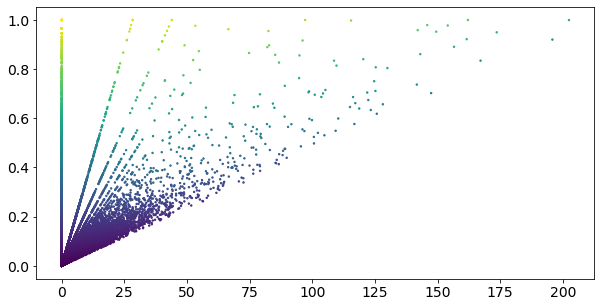

In [33]:
plt.scatter(df.iact_sali, df.iact_norm, s=2, c=df.iact_vanl)

# $\log$-histograms

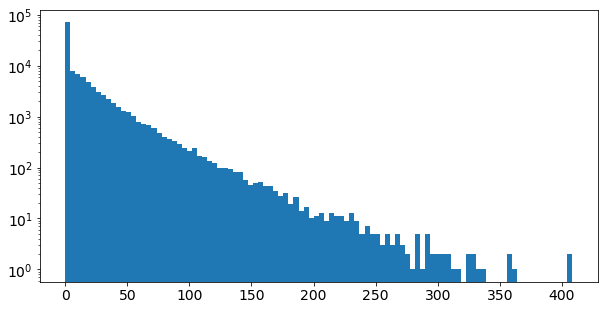

In [20]:
_ = plt.hist(df.pmi_sali, bins=100, log=True)

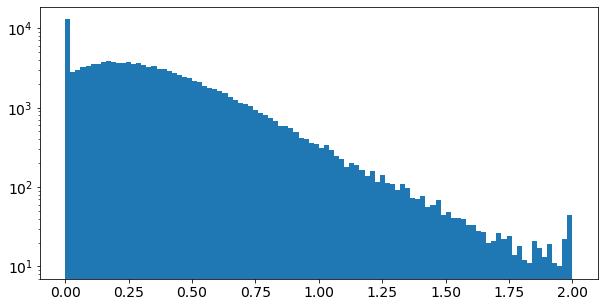

In [34]:
_ = plt.hist(df.pmi_norm, bins=100, log=True)

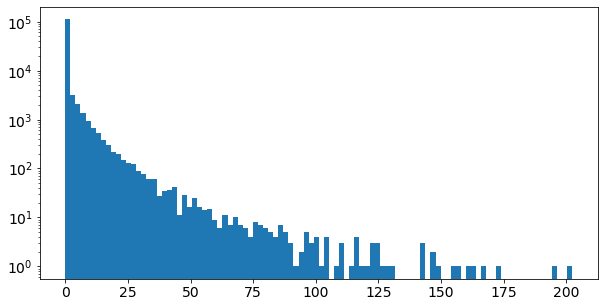

In [22]:
_ = plt.hist(df.iact_sali, bins=100, log=True)

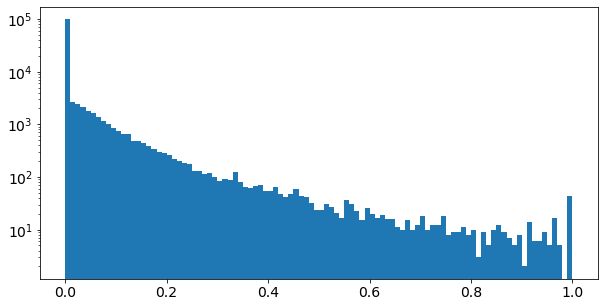

In [23]:
_ = plt.hist(df.iact_norm, bins=100, log=True)